Conversion from .emd to .h5 format.

In [ ]:
# Conversion Function Definitions

from conversion_def import find_and_process_velox_files

In [ ]:
# Convert to HDF5
inputfolder_path= ""

find_and_process_velox_files(inputfolder_path)

Peakfinding using peakfinder8 from diffractem package. First open .h5 file in crystfel using .geom file that refers to correct mask file and find good peakfinding settings. Make sure there are enough friedel pairs for center beam finding and fitting. Don't put the mask in the same folder as the .h5 file since it is also .h5 format. If peakfinding has been run old data will be deleted.

In [1]:
# Peak Finder Function Definitions

from peakfinder_def import find_files_and_run_peakfinding

In [2]:
# Peak Finder
inputfolder_path = '/home/bubl3932/files/UOX1'

# Peakfinder settings:
threshold = 45          
min_snr = 3 
min_pix_count = 3
max_pix_count = 500
local_bg_radius = 9 
min_res = 30    
max_res = 500
x0 = 512
y0 = 512  

##### Enter parameters above #####

find_files_and_run_peakfinding(inputfolder_path, x0, y0, threshold, min_snr, min_pix_count, max_pix_count, local_bg_radius, min_res, max_res)

Processing /home/bubl3932/files/UOX1/UOX_His_MUA_450nm_spot4_ON_20240311_0928.h5
started processing UOX_His_MUA_450nm_spot4_ON_20240311_0928.h5
peak datasets already exist - deleting old data
peak datasets already exist - deleting old data
peak datasets already exist - deleting old data
peak datasets already exist - deleting old data
peak datasets already exist - deleting old data
new datasets created
0 frames processed
1000 frames processed
2000 frames processed
3000 frames processed
4000 frames processed
5000 frames processed
6000 frames processed
7000 frames processed
8000 frames processed
9000 frames processed
10000 frames processed
11000 frames processed
12000 frames processed
13000 frames processed
14000 frames processed
15000 frames processed
16000 frames processed
17000 frames processed
18000 frames processed
19000 frames processed
20000 frames processed
21000 frames processed
22000 frames processed
23000 frames processed
24000 frames processed
25000 frames processed
26000 fram

Find the center beam spot center on all frames using friedel pairs and  interpolation.

In [3]:
# Find Center Beam Spot Center Function Definitions

from centerfinding_def import find_files_and_run_centerfinding

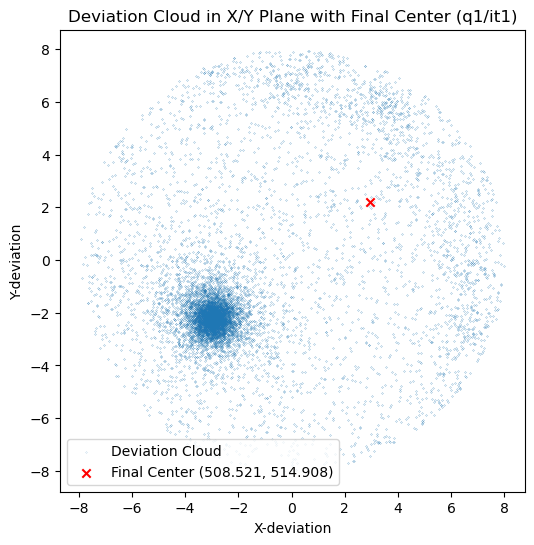

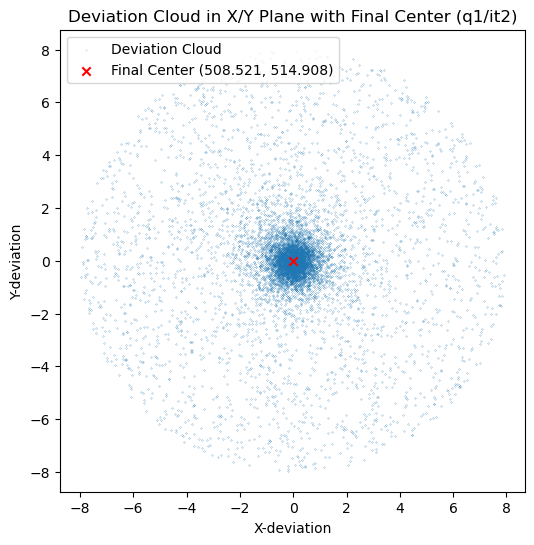

Quarter 1 processed in 1 iterations, final center = [508.521, 514.908], mean deviation = [1.551e-04,2.226e-04]


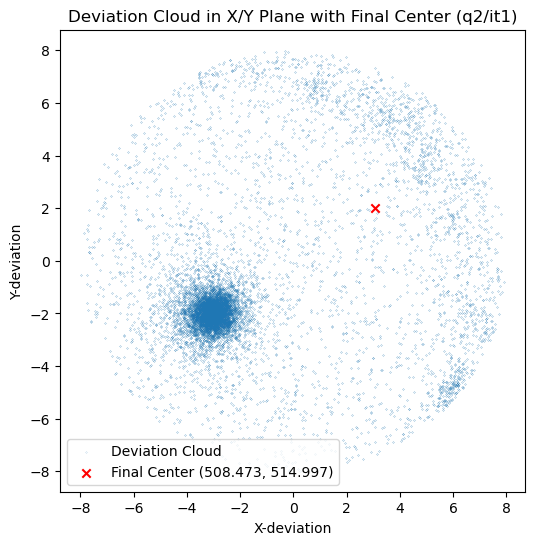

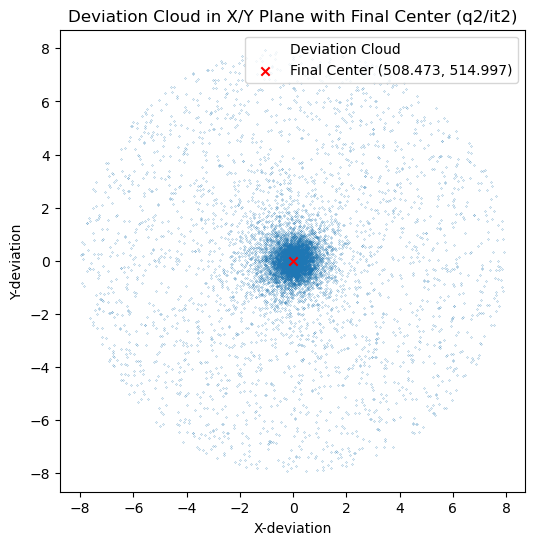

Quarter 2 processed in 1 iterations, final center = [508.473, 514.997], mean deviation = [2.922e-04,1.920e-04]


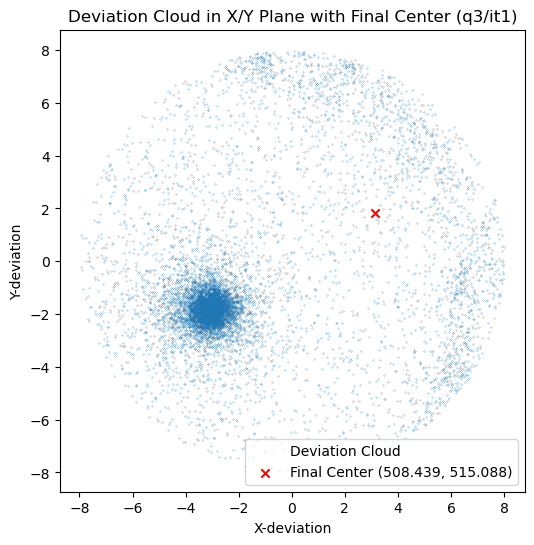

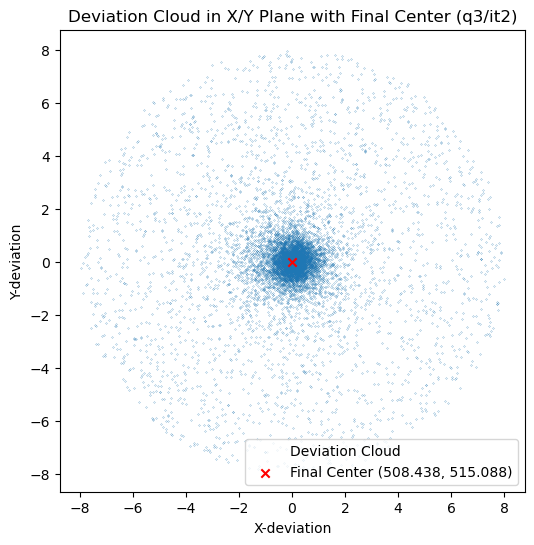

Quarter 3 processed in 1 iterations, final center = [508.438, 515.088], mean deviation = [7.515e-04,6.684e-04]


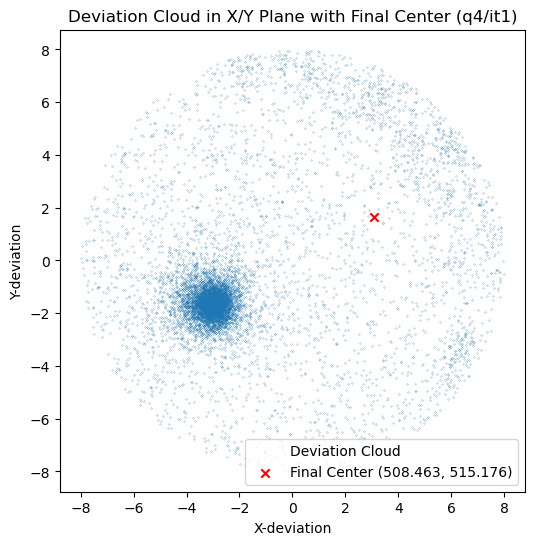

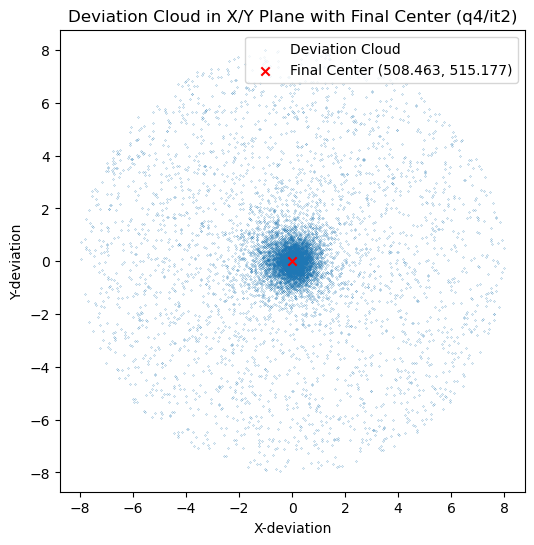

Quarter 4 processed in 1 iterations, final center = [508.463, 515.177], mean deviation = [1.703e-04,4.903e-04]
Interpolating centers based on linear fit
Scope of drift: 0.083 px in x, 0.359 px in y
Interpolated detector shifts written to HDF5 file


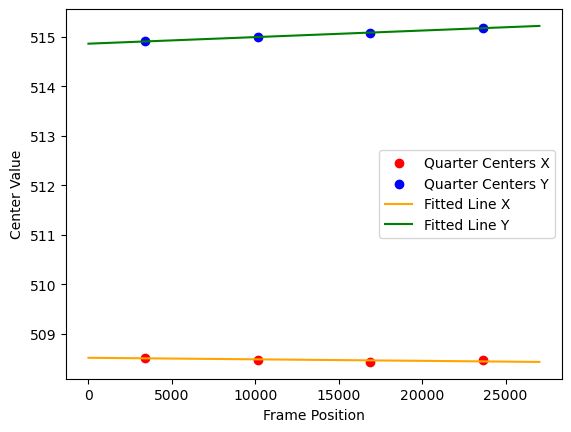

In [4]:
# Find Center Beam Spot Center
tolerance = 8 # If you know that your beam center is close to the center of the detector you can reduce the tolerance to reduce the processing time
min_peaks = 10 # Minimum number of peaks in a frame to be considered
resolution_limit = 200 # Maximum resultuion of peaks to be considered
min_samples_fraction = 0.1  # Fraction of datapoints in the largest cluster to be accepted
x0 = 510
y0 = 516

inputfolder_path= "/home/bubl3932/files/UOX1"

##### Enter parameters above #####

find_files_and_run_centerfinding(inputfolder_path, x0, y0, tolerance, min_peaks, resolution_limit, min_samples_fraction)

Improve the center beam center with a LOWESS fit

In [5]:
# Center Beam Drift Refinement Function Definitions

from centerrefinement_def import find_files_and_run_centerrefinement


Working with UOX_His_MUA_450nm_spot4_ON_20240311_0928.h5


/home/bubl3932/anaconda3/envs/diffractem_env/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:712: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


plotting LOWESS fit


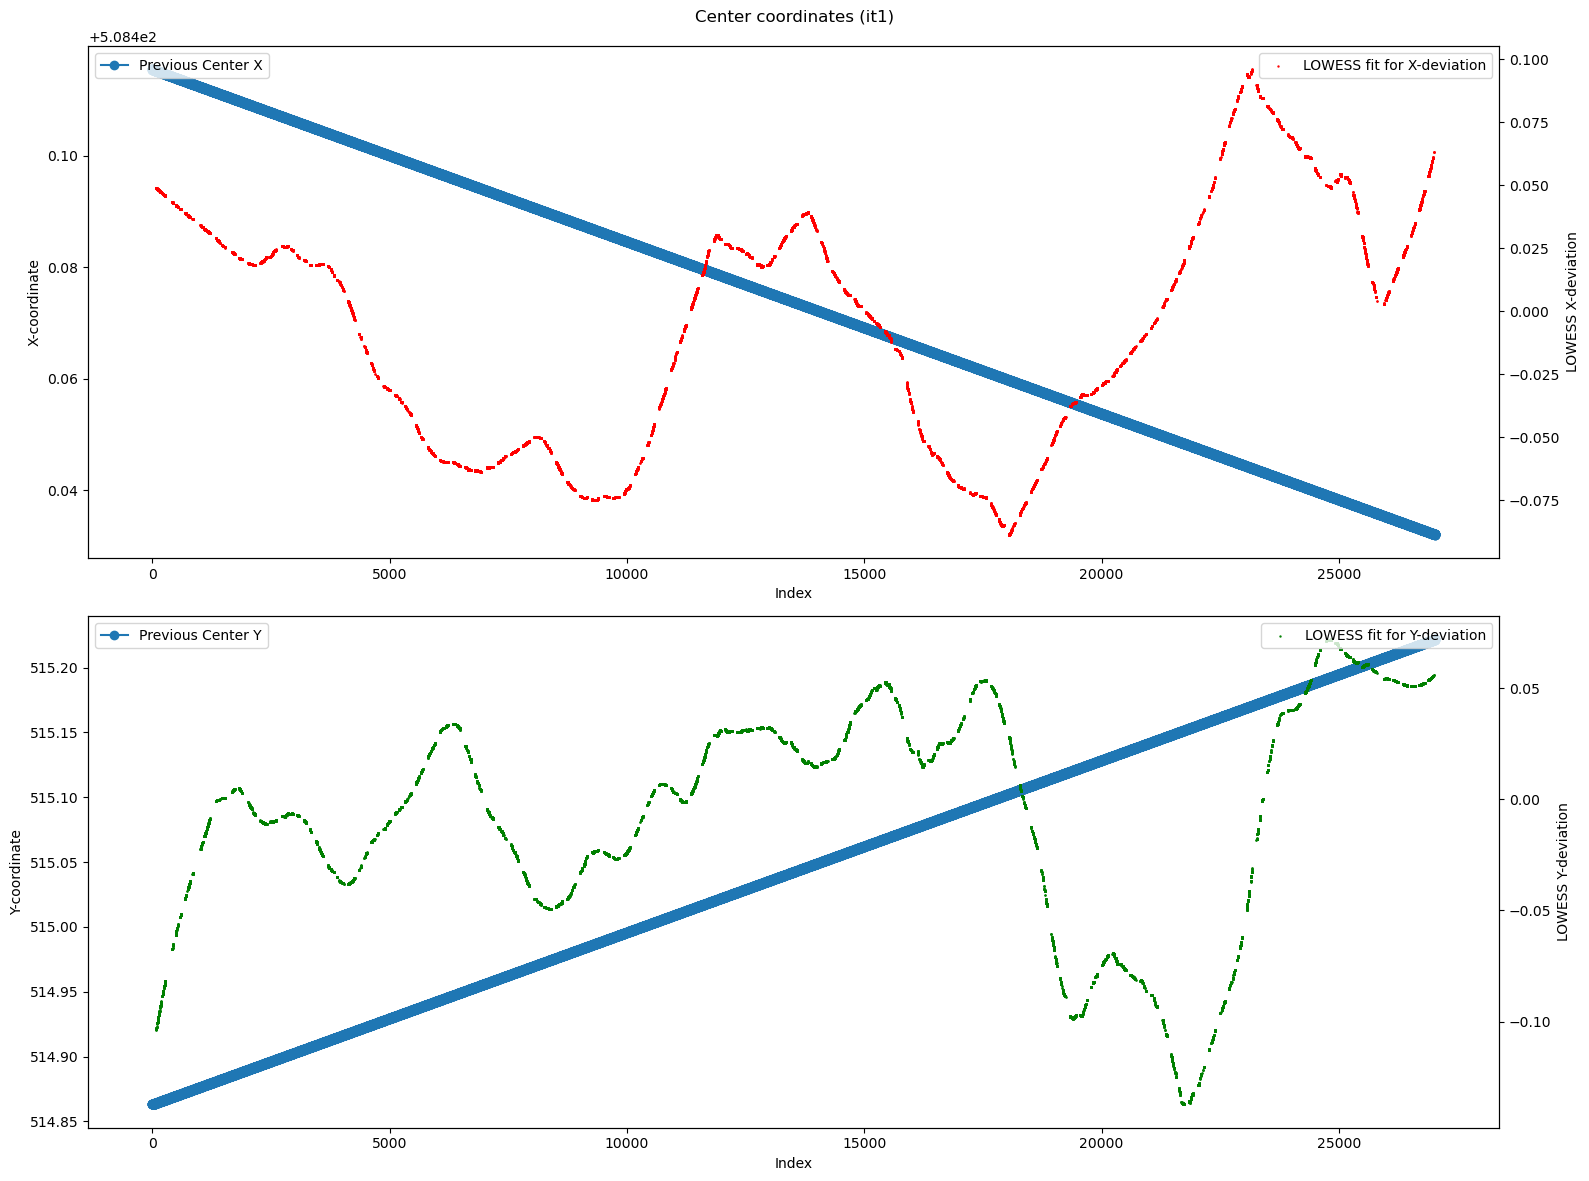

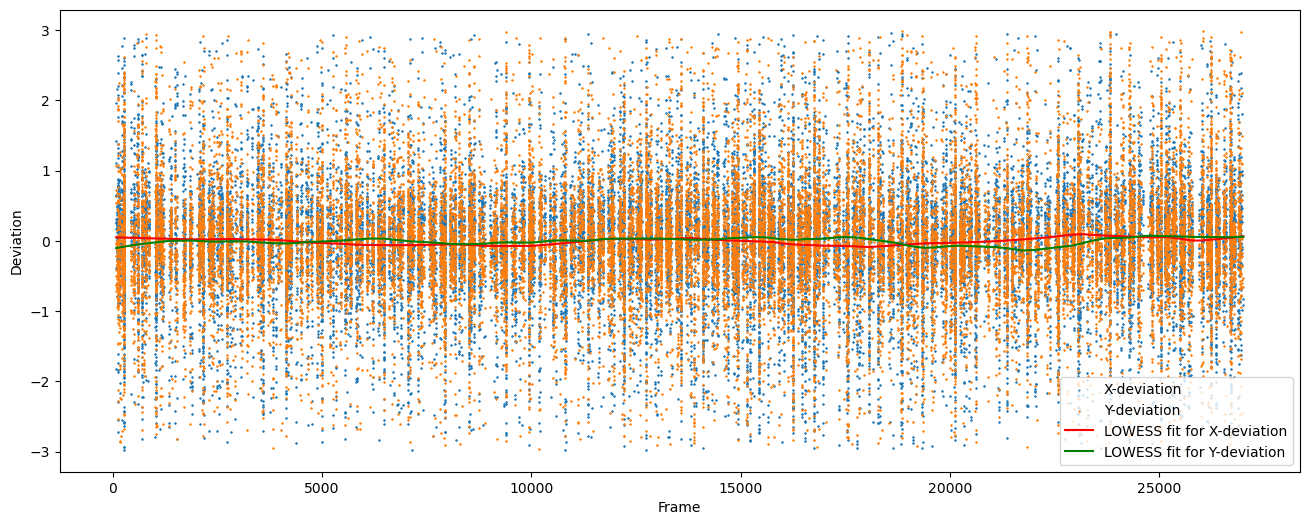

plotting LOWESS fit


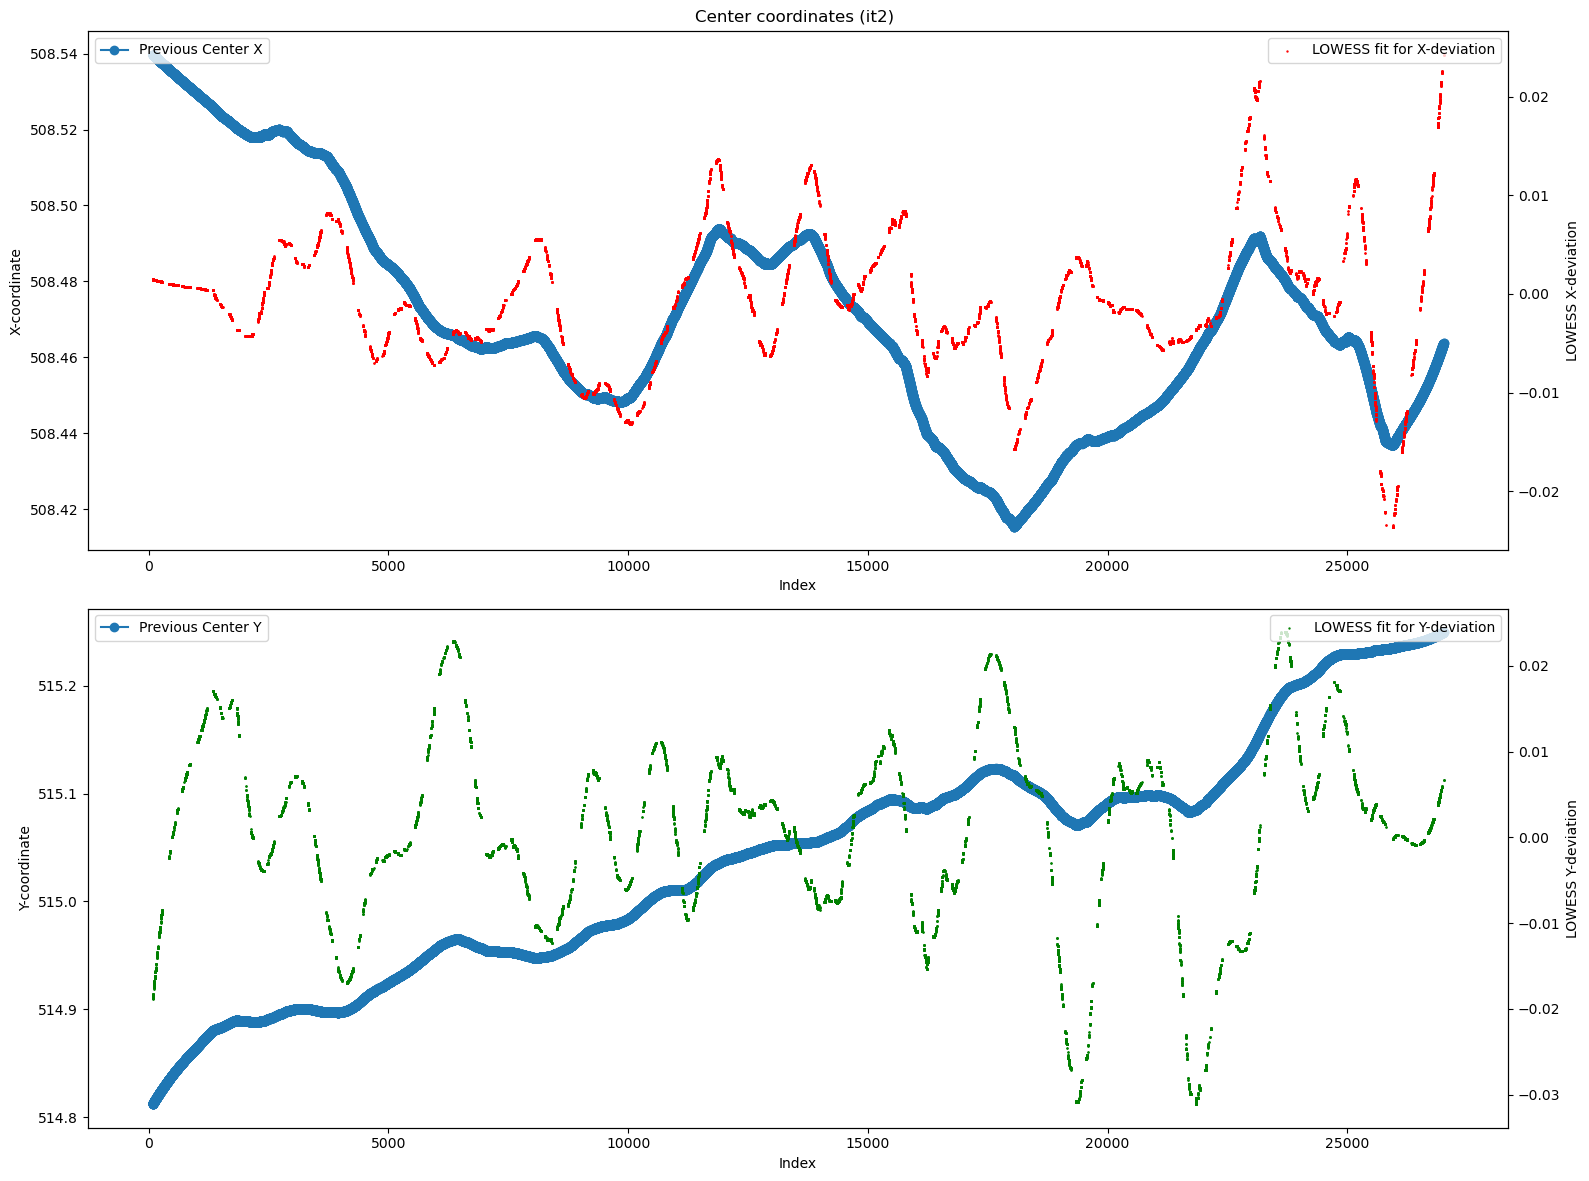

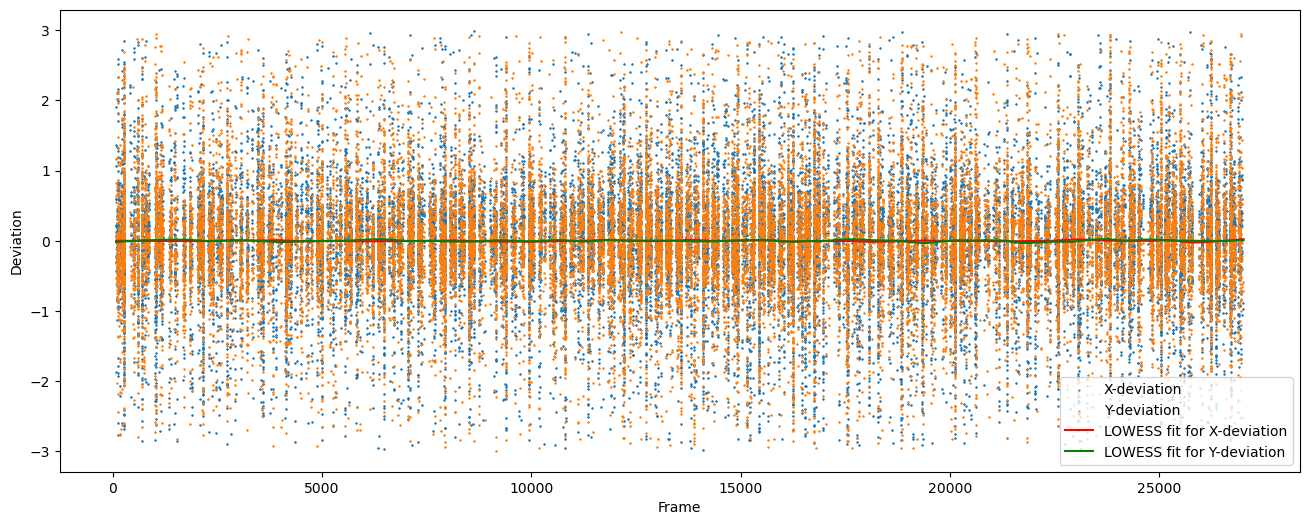

Convergence criterion (deviation from LOWESS < 0.05) met after 2 iteration(s)
Updated detector shifts written to HDF5 file


In [6]:
# Center Beam Drift Refinement
tolerance = 3 # If you know that your beam center is close to the center of the detector you can reduce the tolerance to reduce the processing time
min_peaks = 10 # Minimum number of peaks in frame to be used for refinement
resolution_limit = 400 # Maximum resolution (pixels) of peaks to be considered for refinement
max_iterations = 20 # Maximum number of iterations for refinement
convergence_threshold = 0.05 # Refinement is stopped when the deviation of the LOWESS fit does not exceed the threshold (given in pixels)

inputfolder_path= "/home/bubl3932/files/UOX1"

##### Enter your parameters above #####

find_files_and_run_centerrefinement(inputfolder_path, tolerance, min_peaks, resolution_limit, max_iterations, convergence_threshold)

And now to find the indexing using xGandalf (layers = layers of step size )

In [4]:
# Indexing Function Definitions

from gandalf_iterator import gandalf_iterator

In [5]:
# Indexing (To speed up process make sure output stream is in wsl folder)
geomfile_path = "/home/bubl3932/files/UOX_sim/combined_simulations_P-1_mee_0_0003_angres_5/UOX.geom"
cellfile_path = "/home/bubl3932/files/UOX_sim/combined_simulations_P-1_mee_0_0003_angres_5/UOX.cell"
input_path =   "/home/bubl3932/files/UOX_sim/combined_simulations_P-1_mee_0_0003_angres_5"
output_dir = input_path
output_file_base = "UOX_sim"

num_threads = 23
indexing_method = "xgandalf"
resolution_push = 0
integration_method = "rings"
int_radius = "4,5,8"
min_peaks = 15
xgandalf_tolerance = 0.02
xgandalf_sampling_pitch = 5
xgandalf_iterations = 1
tolerance = "5,5,5,5"
step_size = 0.01
layers = 0
##### Enter your parameters above #####

gandalf_iterator(geomfile_path, cellfile_path, input_path, output_file_base, output_dir, num_threads, indexing_method, resolution_push, integration_method, int_radius, min_peaks, xgandalf_tolerance, xgandalf_sampling_pitch, xgandalf_iterations, tolerance, step_size, layers)


'list.lst' has been created with 1 entries at /home/bubl3932/files/UOX_sim/combined_simulations_P-1_mee_0_0003_angres_5/list.lst


Processing XY pairs:   0%|          | 0/1 [00:00<?, ?it/s]

Running for x=-512, y=-512


This is what I understood your unit cell to be:
orthorhombic I, right handed.
a      b      c            alpha   beta  gamma
 80.58  94.49 103.89 A     90.00  90.00  90.00 deg
List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: on
 Multi-lattice indexing ("delete and retry"): off
                              Retry indexing: on
39 images processed, 39 hits (100.0%), 39 indexable (100.0% of hits, 100.0% overall), 39 crystals, 7.8 images/sec.
82 images processed, 82 hits (100.0%), 79 indexable (96.3% of hits, 96.3% overall), 79 crystals, 8.4 images/sec.
128 images processed, 128 hits (100.0%), 122 indexable (95.3% of hits, 95.3% overall), 122 crystals, 8.9 images/sec.
170 images processed, 170 hits (100.0%), 158 indexable (92.9% of hits, 92.9% overall), 158 crystals,

Then based on RMSD between found peaks and indexed reflections combine the best indexings from xGandalf for each frame to one .stream file and then write a .sol from combinded .stream file.

In [ ]:
# Find Best Results Function Definitions

from best_results_def import find_best_results, read_stream_write_sol

In [ ]:
# Find Best Results
inputfolder_path = '/home/buster/hMTH1_TH287'
lattice = "oP" # Pearson Symbol read from .cell file first letter for lattice type and second for centering

##### Enter your parameters above #####

find_best_results(inputfolder_path)

import os

output_file_path = os.path.join(inputfolder_path, "best_results.stream")

read_stream_write_sol(output_file_path, lattice)

Integrate with best found ring for integration (From Fast Integration)

In [ ]:
# Full Integration Function Definitions

from full_int_def import run_indexamajig_with_frames

In [ ]:
# Full Integration
geomfile_path = ".geom"
cellfile_path = ".cell"
input_path = ""

x = -512
y = -512
num_threads = 23
indexing_method = "file"
resolution_push = 5
integration_method = "rings"
int_radius = "4,5,9"
min_peaks = 5
xgandalf_tolerance = 0.02
xgandalf_sampling_pitch = 5
xgandalf_min_vector_length = 40
xgandalf_max_vector_length = 110
xgandalf_iterations = 1
tolerance = "5,5,5,5"
overpredict = True

##### Enter your parameters above #####

run_indexamajig_with_frames(x, y, geomfile_path, cellfile_path, input_path, num_threads, indexing_method, resolution_push, integration_method, int_radius, min_peaks, xgandalf_tolerance, xgandalf_sampling_pitch, xgandalf_iterations, tolerance)

Merge integration results

In [ ]:
# Full Merge Function Definitions

from full_merge_def import merge_and_write_mtz

In [ ]:
# Merge
input_folder_path = ""
cellfile_path = ""
pointgroup = ""

##### Enter your parameters above #####

merge_and_write_mtz(input_folder_path, cellfile_path, pointgroup)

Refinement using REFMAC5

In [ ]:
# Full Refine Function Definitions

from full_ref_def import process_run_folders

In [ ]:
# Full Refine

run_number = 1
bins = 30

# Global variables for filenames
base_path = ""
pdb_filename = ".pdb"
mtz_orig_filename = "output.mtz"
output_filename = f"output_bins_{bins}.txt"

process_run_folders(base_path, run_number)